# **DATA VISUALIZATION AND EXPLORARION: STUDENT DATASET**

In [1]:
# Installations
!pip install matplotlib --upgrade

# Imports
import random
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Reproducible results
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 1. Mount google drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# 2. unzip the datasets
!unzip 'gdrive/MyDrive/COMS HONS RESEARCH PROJECT/coms_hons_research_dataset'

Archive:  gdrive/MyDrive/COMS HONS RESEARCH PROJECT/coms_hons_research_dataset.zip
  inflating: 20190728 SyntheticData.xlsx  


**Describtion of the features.**
1. **`YearStarted`**: The year the student started first year.
2. **`PlanCode`**: The plan code for the degree.
3. **`PlanDescription`**: The plan description for the degree.
4. **`ProbOfMatheStreamline`**: The probability of mathemathematics streamline.
5. **`ProbOfPhysicsStreamline`**: The probability of physics streamline.
6. **`ProbofEarthStreamline`**: The probability of earth science streamline.
7. **`ProbofBioStreamline`**: The probability of biology streamline.
9. **`AggregateYOS1`**: The aggregate for first year.
10. **`ProgressoutcomeYOS1`**: The progress outcome for first year.
11. **`Firstyearoutcome`**: The final outcome for first year.
12. **`AggregateYOS2`**: The aggregate for second year.
13. **`ProgressoutcomeYOS2`**: The progress outcome for second year.
14. **`Secondyearoutcome`**: The final outcome for second year.
15. **`AggregateYOS3`**: The aggregate for third year.
16. **`ProgressoutcomeYOS3`**: The progress outcome for third year.
17. **`Finaloutcome`**: The final outcome for third year.
18. **`Aggregate`**: The total aggregate for all years.
19. **`Qualified`**: Whether the student failed to qualify or qulified to get the degree.
20. **`NumberOfYearsforDegree`**: The number of years the student took to finish the degree. 
21. **`RaceDescription`**: The race of the student.
22. **`Language`**: The langauge of the student.
23. **`Gender`**: The gender of the student.
24. **`Homeprovince`**: The home province of the student.
25. **`Homecountry`**: The home country of the student.
26. **`AgeatFirstYear`**: The students' age at first year.
27. **`AgeatSecondYear`**: The students' age at second year.
28. **`AgeatatThirdYear`**: The students' age at third year.
30. **`isRuralorUrban`**: Whether the student stays in rural or urban areas.
31. **`LifeOrientation`**: The matric life orientation grade for the student.
32. **`MathematicsMatricLit`**: The matric maths literacy grade for the student.
33. **`MathematicsMatricMajor`**: The matric maths grade for the student.
34. **`EnglishFirstLang`**: The matric english home language grade for the student.
35. **`EnglishFirstAdditional`**: The matric english first additional language grade for the student.
36. **`Computers`**: The matric computers grade for the student.
37. **`AdditionalMathematics`**: The matric additional maths grade for the student.
38. **`NBTAL`**: The matric NBTAL grade for the student.
39. **`NBTMA`**: The matric NBTMA grade for the student.
40. **`NBTQL`**: The matric NBTQL grade for the student.

#### **1. DESCRIBE THE DATASET.**

In [4]:
# read the excel file into memory and display the head
df = pd.read_excel('20190728 SyntheticData.xlsx')
df.head()

,RiskStatus,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofEarthStreamline,ProbofBioStreamline,ProbofUnknownStreamline,AggregateYOS1,...,MathematicsMatricLit,MathematicsMatricMajor,EnglishFirstLang,EnglishFirstAdditional,Computers,AdditionalMathematics,NBTAL,NBTMA,NBTQL,Nostudentrrecord
0,Highest Risk,2008,SFOSSCED60,Science Education,0.000000,0.000000,0.0,0.000000,1.000000,29.888889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Lowest Risk,2016,SMAJACSI10,Actuarial Science,0.888889,0.000000,0.0,0.000000,0.111111,80.000000,...,NaN,81.0,NaN,86.0,NaN,NaN,57.0,81.0,67.0,1
2,High Risk,2017,SMAJGEN00,General,0.571429,0.000000,0.0,0.000000,0.428571,42.142857,...,NaN,58.0,NaN,80.0,NaN,NaN,45.0,58.0,49.0,1
3,Lowest Risk,2008,SMAJHBIO10,Human Biology,0.058824,0.176471,0.0,0.058824,0.705882,82.200000,...,NaN,56.0,NaN,NaN,NaN,NaN,72.0,56.0,84.0,1
4,High Risk,2013,SMAJGEN00,General,0.600000,0.000000,0.0,0.000000,0.400000,13.600000,...,NaN,65.0,NaN,0.0,NaN,0.0,65.0,65.0,51.0,1


In [5]:
# print the columns for the dataset
print(np.array(df.columns))

['RiskStatus' 'YearStarted' 'PlanCode' 'PlanDescription'
 'ProbOfMatheStreamline' 'ProbOfPhysicsStreamline' 'ProbofEarthStreamline'
 'ProbofBioStreamline' 'ProbofUnknownStreamline' 'AggregateYOS1'
 'ProgressoutcomeYOS1' 'Firstyearoutcome' 'AggregateYOS2'
 'ProgressoutcomeYOS2' 'Secondyearoutcome' 'AggregateYOS3'
 'ProgressoutcomeYOS3' 'Finaloutcome' 'Aggregate' 'Qualified'
 'NumberOfYearsforDegree' 'RaceDescription' 'Language' 'Gender'
 'Homeprovince' 'Homecountry' 'AgeatFirstYear' 'AgeatSecondYear'
 'AgeatatThirdYear' 'Var30' 'isRuralorUrban' 'LifeOrientation'
 'MathematicsMatricLit' 'MathematicsMatricMajor' 'EnglishFirstLang'
 'EnglishFirstAdditional' 'Computers' 'AdditionalMathematics' 'NBTAL'
 'NBTMA' 'NBTQL' 'Nostudentrrecord']


In [6]:
# print the number of columns and rows
print('Number of rows:', len(df))
print('Number of columns:', len(np.array(df.columns)))

Number of rows: 14326
Number of columns: 42


In [7]:
# describe the dataset
df.describe()

,YearStarted,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofEarthStreamline,ProbofBioStreamline,ProbofUnknownStreamline,AggregateYOS1,AggregateYOS2,AggregateYOS3,Aggregate,...,MathematicsMatricLit,MathematicsMatricMajor,EnglishFirstLang,EnglishFirstAdditional,Computers,AdditionalMathematics,NBTAL,NBTMA,NBTQL,Nostudentrrecord
count,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14270.000000,7366.000000,5171.000000,14254.000000,...,113.000000,10353.000000,5515.000000,4928.000000,1506.000000,2251.000000,6911.000000,6816.000000,6875.000000,14326.000000
mean,2013.067290,0.357111,0.185560,0.097355,0.187697,0.172277,46.122661,51.599178,60.060096,45.754323,...,61.469027,54.696803,66.683046,64.535106,68.656707,54.529542,60.341485,50.517899,54.702982,0.740542
std,3.354694,0.355213,0.255817,0.259525,0.300861,0.262187,21.665101,19.965474,10.731449,21.204398,...,33.752796,22.472014,22.685347,23.750573,24.149528,32.448734,12.913887,16.173200,15.651423,0.438353
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,2.000000,17.000000,0.000000
25%,2010.000000,0.032258,0.000000,0.000000,0.000000,0.000000,38.087500,47.166667,53.666667,38.250000,...,39.000000,40.000000,66.000000,65.000000,64.000000,40.000000,50.000000,38.000000,42.000000,0.000000
50%,2013.000000,0.250000,0.058824,0.000000,0.000000,0.032086,51.875000,55.666667,60.200000,51.250000,...,75.000000,55.000000,72.000000,71.000000,75.000000,59.000000,61.000000,48.000000,52.000000,1.000000
75%,2016.000000,0.695652,0.315646,0.000000,0.250000,0.250000,60.250000,63.250000,66.800000,59.750000,...,87.000000,72.000000,78.000000,77.000000,84.000000,77.000000,71.000000,60.000000,65.000000,1.000000
max,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,97.000000,95.875000,100.000000,...,100.000000,100.000000,100.000000,97.000000,99.000000,777.000000,92.000000,98.000000,99.000000,1.000000


In [8]:
# print the datatypes for the columns
df.dtypes

RiskStatus                  object
YearStarted                  int64
PlanCode                    object
PlanDescription             object
ProbOfMatheStreamline      float64
ProbOfPhysicsStreamline    float64
ProbofEarthStreamline      float64
ProbofBioStreamline        float64
ProbofUnknownStreamline    float64
AggregateYOS1              float64
ProgressoutcomeYOS1         object
Firstyearoutcome            object
AggregateYOS2              float64
ProgressoutcomeYOS2         object
Secondyearoutcome           object
AggregateYOS3              float64
ProgressoutcomeYOS3         object
Finaloutcome                object
Aggregate                  float64
Qualified                   object
NumberOfYearsforDegree       int64
RaceDescription             object
Language                    object
Gender                      object
Homeprovince                object
Homecountry                 object
AgeatFirstYear               int64
AgeatSecondYear            float64
AgeatatThirdYear    

In [9]:
# 1. display the total nulls in the dataset when Nostudentrrecord = 0
print('Info when Nostudentrrecord = 0:')
print('No. of rows:', len(df[df['Nostudentrrecord'] == 0]))
print('No. of nulls:', df[df['Nostudentrrecord'] == 0].isna().sum().sum(), '\n')

# 2. display the total nulls in the dataset when Nostudentrrecord = 1
print('Info when Nostudentrrecord = 1:')
print('No. of rows:', len(df[df['Nostudentrrecord'] == 1]))
print('No. of nulls:', df[df['Nostudentrrecord'] == 1].isna().sum().sum())

Info when Nostudentrrecord = 0:
No. of rows: 3717
No. of nulls: 63333 

Info when Nostudentrrecord = 1:
No. of rows: 10609
No. of nulls: 83539


From above we can see that when `Nostudentrrecord` = $0$ we have less nulls than when `Nostudentrrecord` = $1$.

In [10]:
# display the percentage of nulls for each column when Nostudentrrecord = 0, 1
df1 = df[df['Nostudentrrecord'] == 0].isna().sum()/len(df[df['Nostudentrrecord'] == 0])
df1 = pd.DataFrame({'Column': df1.index, '0': df1.values})
df2 = df[df['Nostudentrrecord'] == 1].isna().sum()/len(df[df['Nostudentrrecord'] == 1])
df2 = pd.DataFrame({'Column': df2.index, '1': df2.values})
df_nulls = df1.merge(df2, how='left')
df_nulls = df_nulls[((df_nulls['0'] == 0) & (df_nulls['1'] == 0))^True]
df_nulls

,Column,0,1
9,AggregateYOS1,0.012376,0.000943
12,AggregateYOS2,0.707829,0.408050
13,ProgressoutcomeYOS2,0.705408,0.407673
15,AggregateYOS3,0.862524,0.560750
16,ProgressoutcomeYOS3,0.862524,0.560468
18,Aggregate,0.014797,0.001602
22,Language,0.002959,0.004430
24,Homeprovince,0.302394,0.030823
27,AgeatSecondYear,0.705408,0.407673
28,AgeatatThirdYear,0.862524,0.560468


From the `DataFrame` above we can see that when `Nostudentrrecord` = $0$, we have many columns which are nulls i.e., about 12 columns are null; than when `Nostudentrrecord` = $1$. From here onwards, we are going to use the dataset when `Nostudentrrecord` = $1$.

In [11]:
# change the dataset to use the data when Nostudentrrecord = 1.
df = df[df['Nostudentrrecord'] == 1].copy()

#### **2. CLEAN AND VISUALIZE THE COLUMNS.**

###### **2.1 Explore the `YearStarted` Column.**

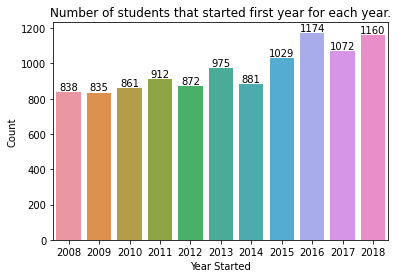

In [12]:
# 1. plot the distribution for the YearStarted column
df1 = df['YearStarted'].value_counts()
ax = sns.barplot(x=df1.index, y=df1.values)
ax.set_xlabel('Year Started')
ax.set_ylabel('Count')
ax.set_title('Number of students that started first year for each year.')
ax.bar_label(ax.containers[0])
plt.show()

###### **2.2 Explore the `PlanCode` Column.**

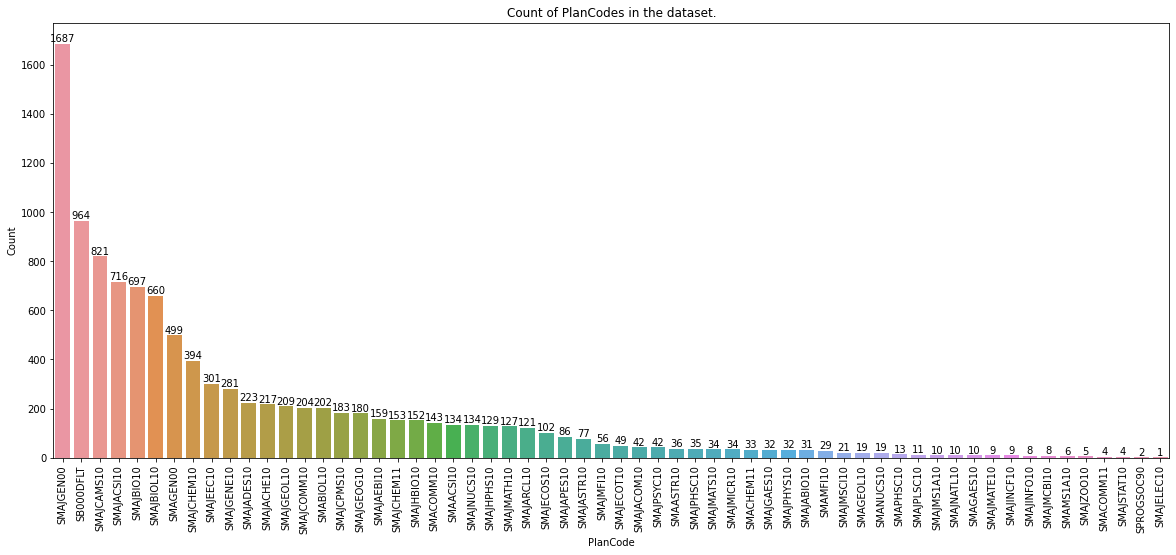

In [13]:
# 1. display the plan codes
df1 = df['PlanCode'].value_counts()
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=df1.index, y=df1.values)
ax.set_xlabel('PlanCode')
ax.set_ylabel('Count')
ax.set_title('Count of PlanCodes in the dataset.')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

###### **2.3 Explore the `PlanDescription` Column.**

In [14]:
# 1. diplay the plan description
print(np.unique(df['PlanDescription']))

['Actuarial Science' 'Advanced Earth Sciences'
 'Animal, Plant and Environmental Sciences'
 'Applied & Experimental Physiology' 'Applied Bioinformatics'
 'Applied Chemistry' 'Applied Computing' 'Archaeology'
 'Astronomy Astrophysics' 'Atronomy Astrophysics'
 'Biochemistry and Cell Biology' 'Biological Sciences' 'Chemistry'
 'Chemistry with Chemical Engineering'
 'Computational and Applied Mathematics' 'Computer Science'
 'Computer Science (Part-time)' 'Ecology, Environment and Conservation'
 'Economic Science' 'Economic Theory' 'Electrical Engineering' 'General'
 'Genetics & Development Biology' 'Geography'
 'Geography and Archaeology Sciences' 'Geology' 'Human Biology'
 'Human Physiology' 'Information Systems'
 'Investment and Corporate Finance' 'Material Science with Metallurgy'
 'Materials Science' 'Mathematical Sciences' 'Mathematical Sciences A'
 'Mathematical Statistics' 'Mathematics' 'Mathematics Techniques'
 'Mathematics of Finance' 'Medical Cell Biology'
 'Microbiology and Bio

From above, we can see that the **`PlanDescription`** for some programmes contain some errors. eg **`Atronomy Astrophysics`** and **`Astronomy Astrophysics`** seem to be the same plan description. The only difference is that the other one the spelling is incorrect.

In [15]:
# 2. clean the plan description.
col = 'PlanDescription'
df[col][df[col] == 'Atronomy Astrophysics'] = 'Astronomy Astrophysics'
df[col][df[col] == 'Mathematical Sciences A'] = 'Mathematical Sciences'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


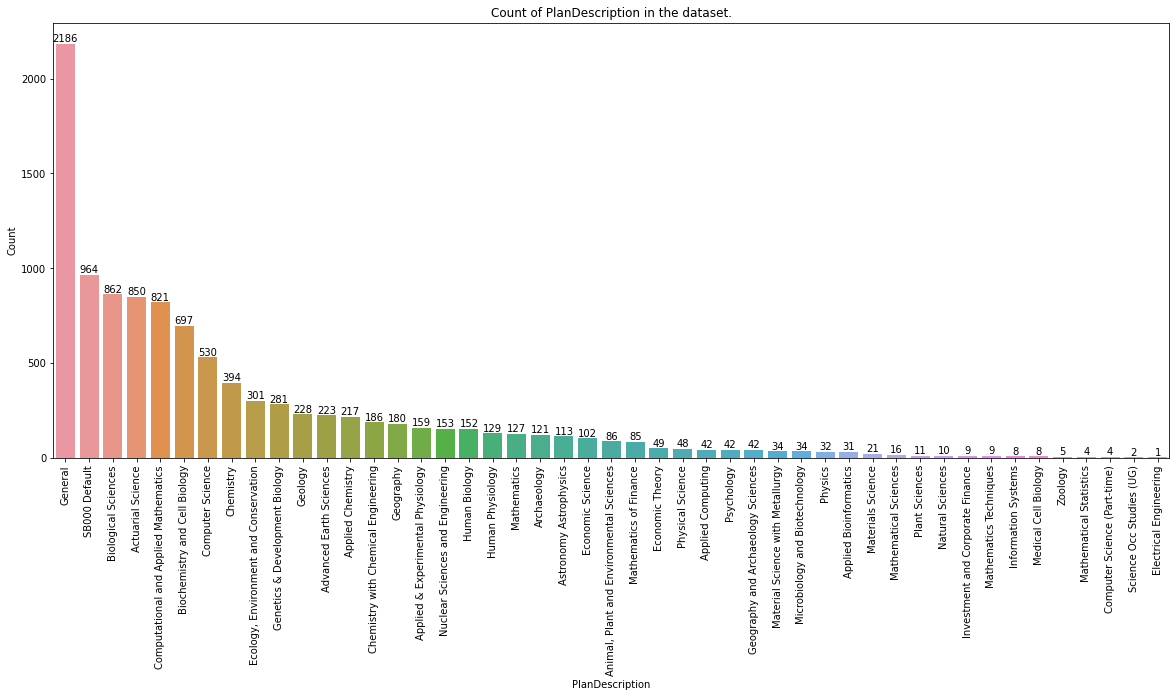

In [16]:
# 3. display the count for the PlanDescription.
df1 = df['PlanDescription'].value_counts()
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=df1.index, y=df1.values)
ax.set_xlabel('PlanDescription')
ax.set_ylabel('Count')
ax.set_title('Count of PlanDescription in the dataset.')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

###### **2.4 Explore the `ProbOfMatheStreamline`, `ProbOfPhysicsStreamline`, `ProbofEarthStreamline`, `ProbofBioStreamline` columns.**

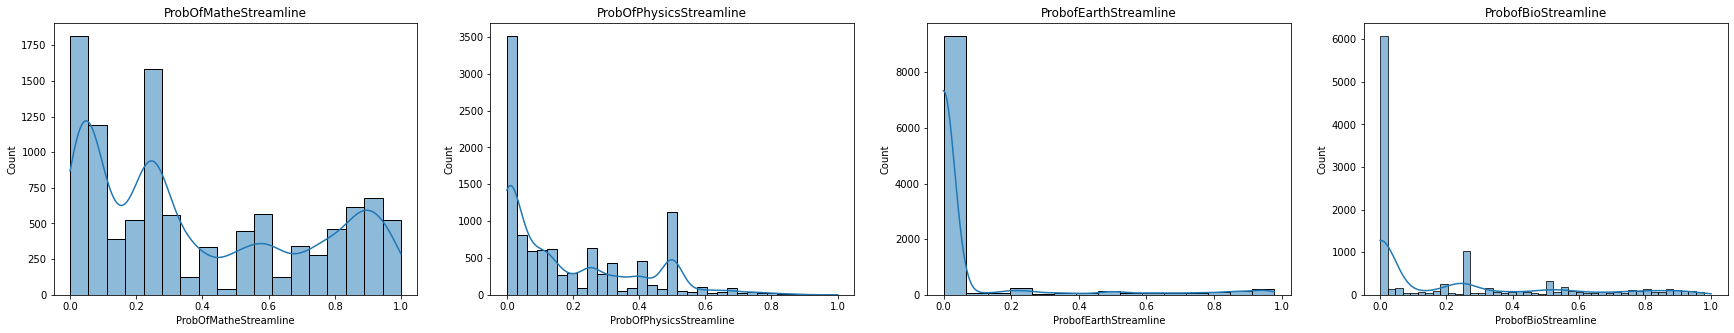

In [17]:
# 1. display the probability distributions for the streamlines
prob_columns = ['ProbOfMatheStreamline', 'ProbOfPhysicsStreamline', 
                'ProbofEarthStreamline', 'ProbofBioStreamline']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))
ax = axes.ravel()
for i in range(len(prob_columns)):
  sns.histplot(df[prob_columns[i]], kde=True, ax=ax[i])
  ax[i].set_title(prob_columns[i])
plt.show()

From the above distributions, we can already see that there exist some outliers in the dataset. For example, looking at the distributions it looks like we have more zeros which makes the distributions not look like normal distributions except the fact that some look like there are multi peaks or multimodal normal distributions. Let's check how many zeros in each column and we can decide if whether we want to remove the corresponding rows or not.

In [18]:
# 2. lets check the percentage of zeros in the probability columns.
print('Percentage of Zeros:')
for i in range(len(prob_columns)):
  print(prob_columns[i],':', len(df[df[prob_columns[i]] == 0])/ len(df))

Percentage of Zeros:
ProbOfMatheStreamline : 0.011688189273258555
ProbOfPhysicsStreamline : 0.2510132906023188
ProbofEarthStreamline : 0.8645489678574795
ProbofBioStreamline : 0.5610330851164106


From above, `ProbofEarthStreamline` and `ProbofBioStreamline` have more zeros, i.e., more than $50\%$ of the probabilities are zeros. We will decide if whether we are going to remove them or not when we preprocess the data.

###### **2.5 Explore the `AggregateYOS1`, `AggregateYOS2`, `LifeOrientation`, `MathematicsMatricLit`, `MathematicsMatricMajor`, `AgeatFirstYear`, `AgeatSecondYear`, `EnglishFirstLang`, `EnglishFirstAdditional`, `Computers`, `AdditionalMathematics`, `NBTAL`, `NBTMA`, `NBTQL` columns.**

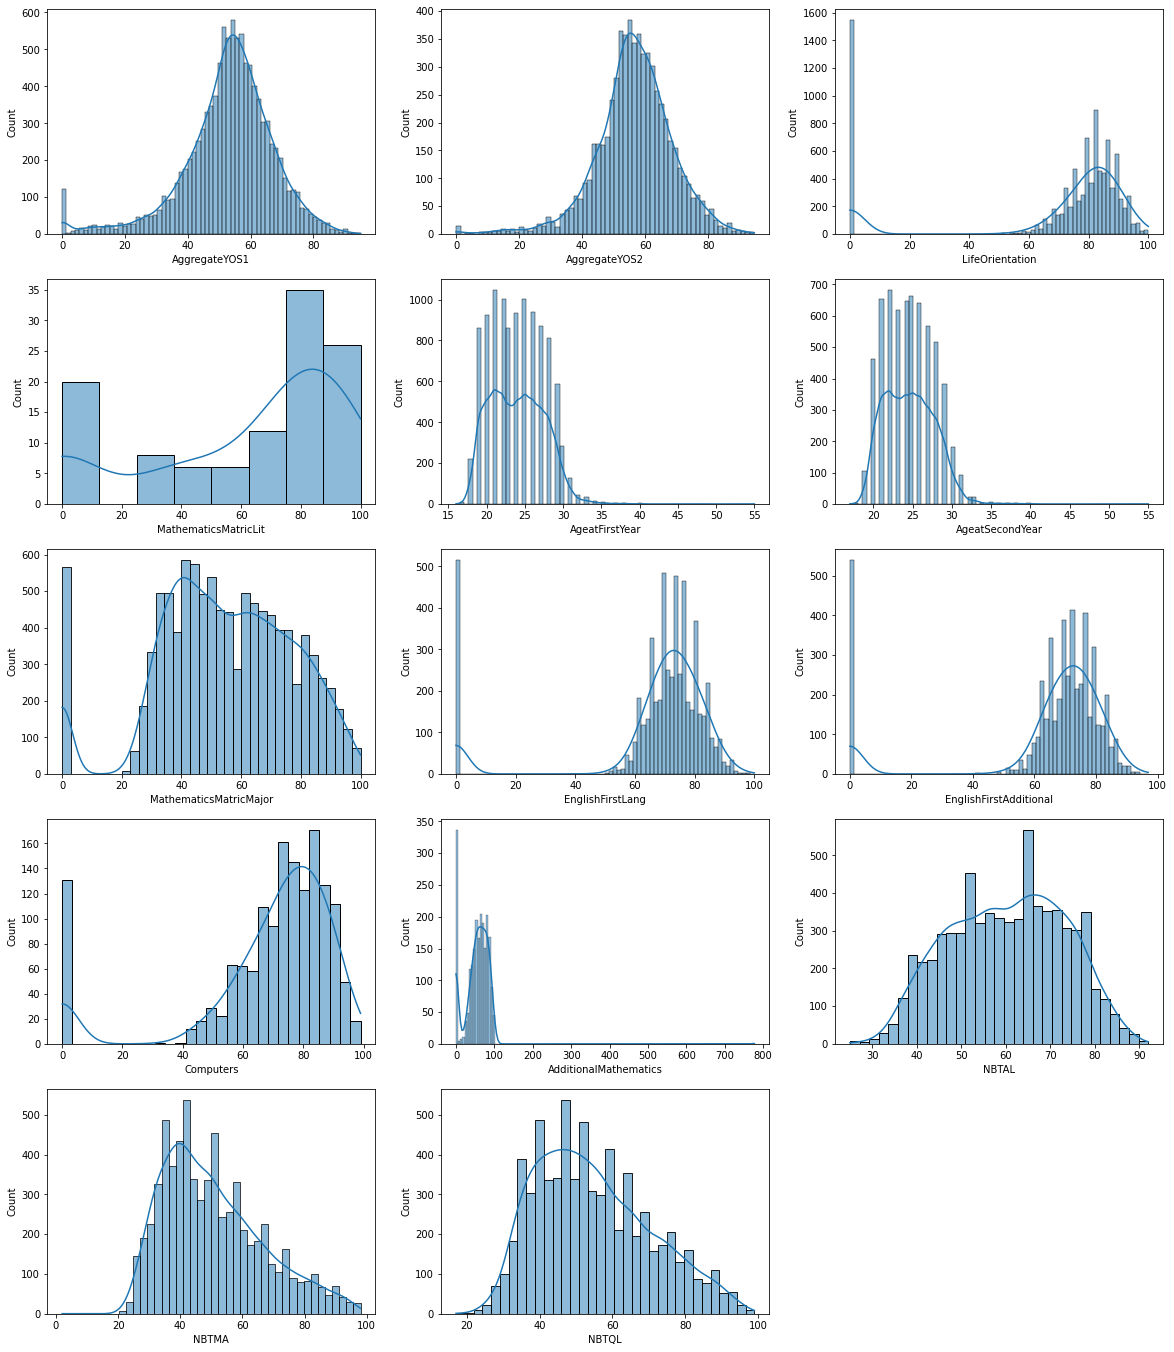

In [19]:
# 1. display the probability distributions for the grade columns
grade_age_columns = ['AggregateYOS1', 'AggregateYOS2', 'LifeOrientation', 
                     'MathematicsMatricLit', 'AgeatFirstYear', 'AgeatSecondYear',
                     'MathematicsMatricMajor', 'EnglishFirstLang', 'EnglishFirstAdditional', 
                     'Computers', 'AdditionalMathematics', 'NBTAL', 'NBTMA', 'NBTQL']
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 24))
ax = axes.ravel()
for i in range(len(grade_age_columns)):
  sns.histplot(df[grade_age_columns[i]], kde=True, ax=ax[i])
for i in range(len(grade_age_columns), 15):
  ax[i].axis('off')
  ax[i].grid(False)
plt.show()

As seen above, here also we have outliers which tend to be the zeros. The fact that some of the columns have huge number of zeros makes our distributions not look like normal distributions. I am beginning to think that maybe there are not outliers. I think this might be due to the fact that not every student was studying all the subjects in secondary school. For example, some students who study maths, they don't study maths literacy. So I believe this is the reason why we have more zeros in some columns. I am just going to remove some potential outliers even if i believe they might not be outliers.

In [20]:
# 2. remove potential outliers.
df = df[(df['LifeOrientation'] != 0) & (df['AdditionalMathematics'] != 0) & 
          (df['AggregateYOS1'] != 0) & (df['EnglishFirstAdditional'] != 0) & 
          (df['EnglishFirstLang'] != 0) & (df['Computers'] != 0) & (df['MathematicsMatricMajor'] != 0) & 
          ((df['AdditionalMathematics'] <= 100) | (df['AdditionalMathematics'].isnull())) & 
          (df['MathematicsMatricLit'] != 0)]

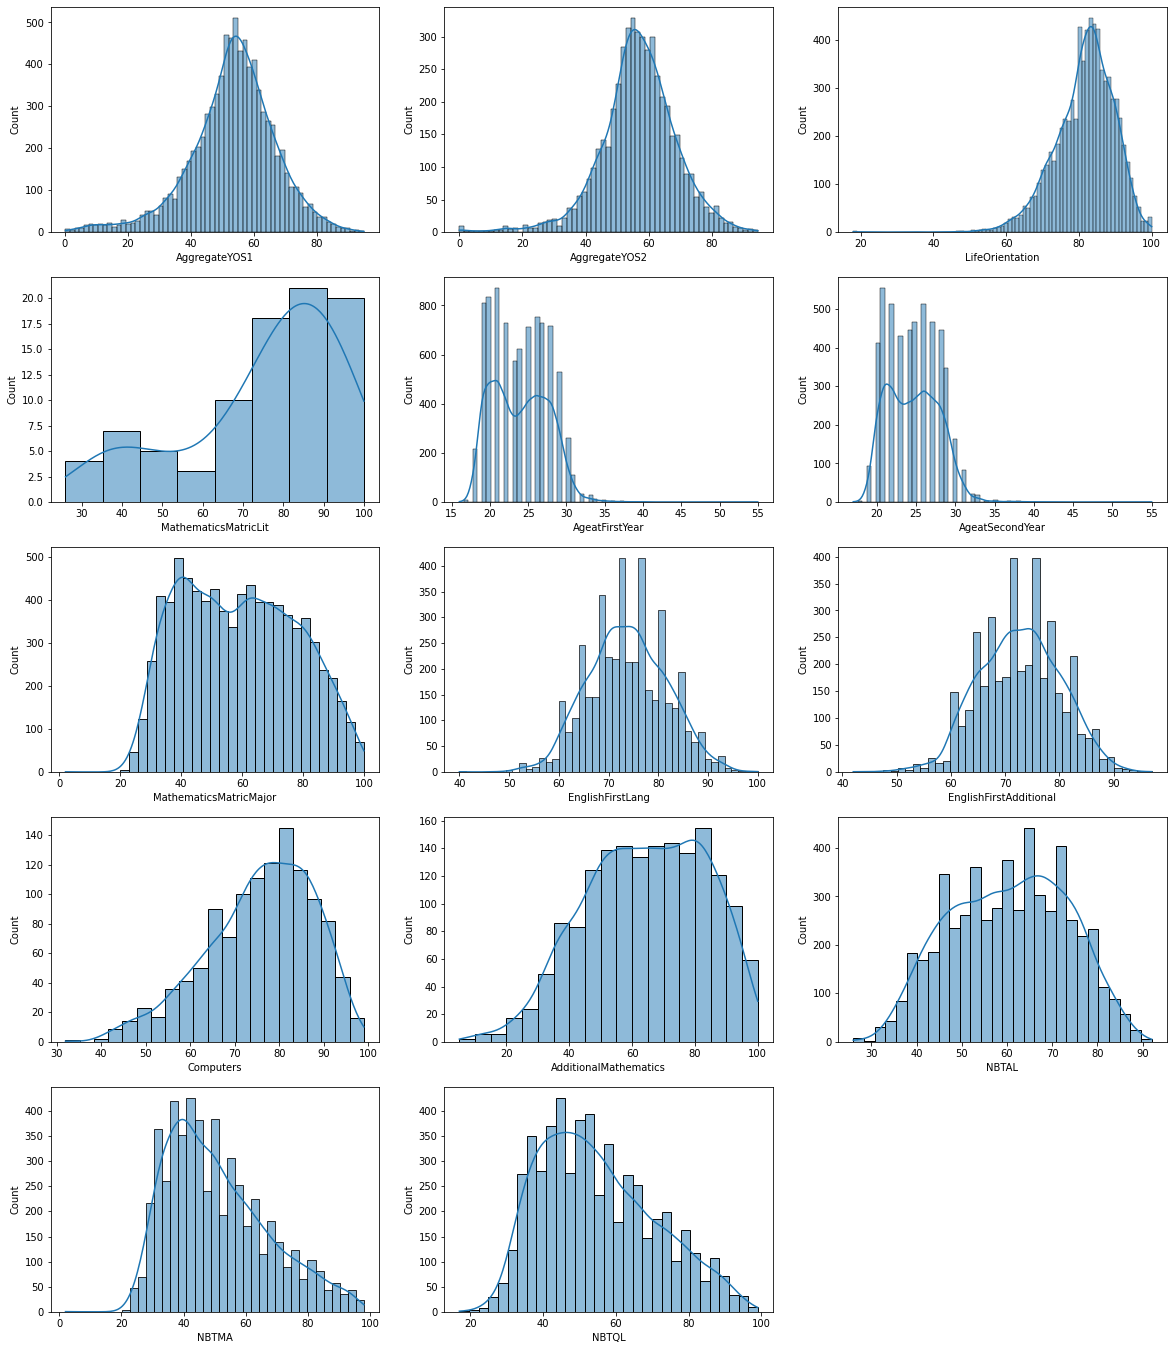

In [21]:
# 3. replot
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 24))
ax = axes.ravel()
for i in range(len(grade_age_columns)):
  sns.histplot(df[grade_age_columns[i]], kde=True, ax=ax[i])
for i in range(len(grade_age_columns), 15):
  ax[i].axis('off')
  ax[i].grid(False)
plt.show()

###### **2.6 Explore the `ProgressoutcomeYOS1`, `ProgressoutcomeYOS2`, `Firstyearoutcome`, `Secondyearoutcome`, `RaceDescription`, `Gender`, `isRuralorUrban`, `NumberOfYearsforDegree` columns.**

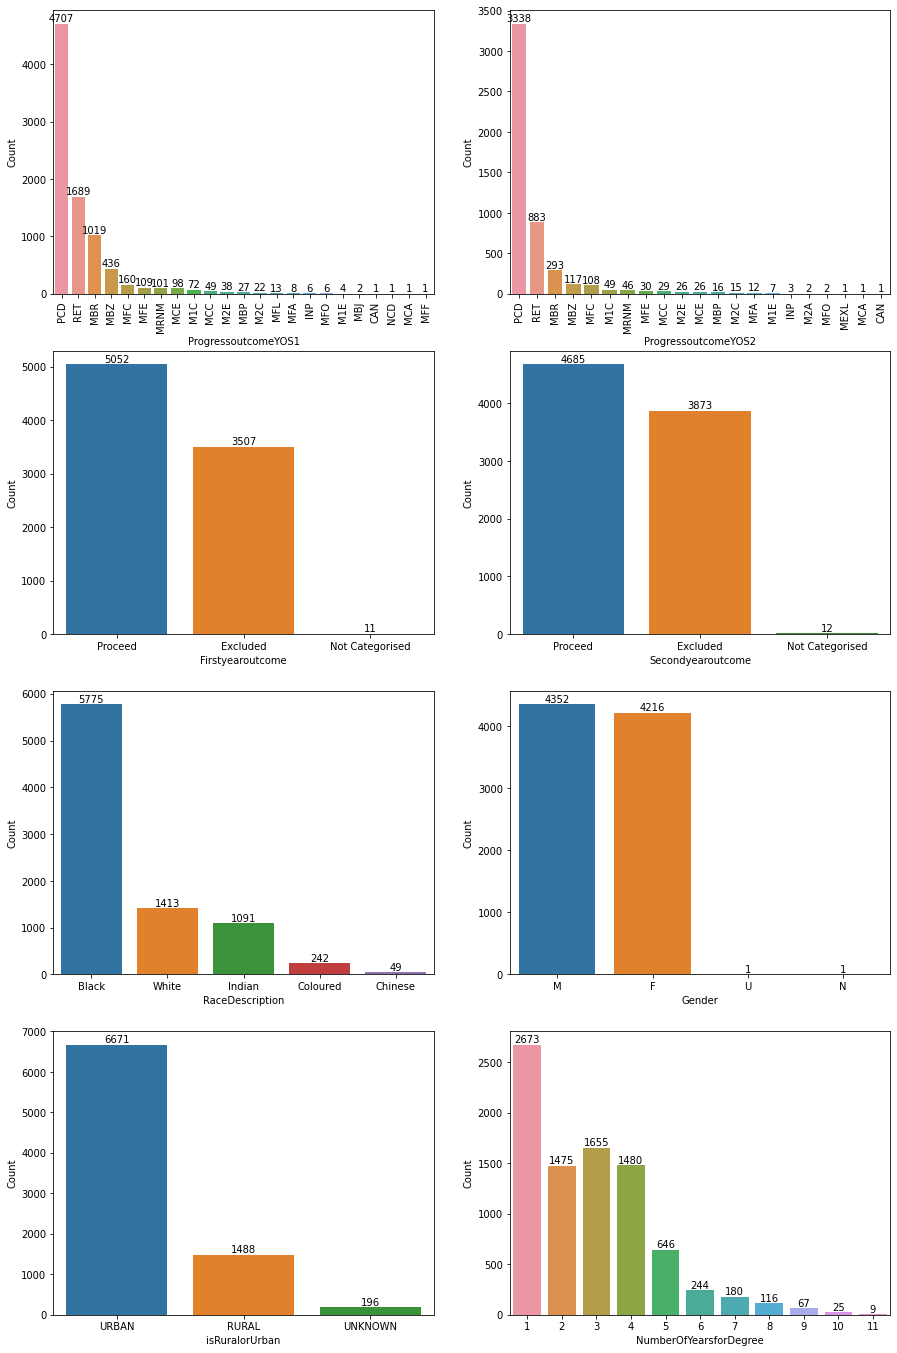

In [22]:
# 1. display the distributions of the columns
discrete_columns = ['ProgressoutcomeYOS1', 'ProgressoutcomeYOS2', 
                    'Firstyearoutcome', 'Secondyearoutcome', 'RaceDescription', 
                    'Gender', 'isRuralorUrban', 'NumberOfYearsforDegree']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 24))
ax = axes.ravel()
for i in range(len(discrete_columns)):
  df1 = df[discrete_columns[i]].value_counts()
  sns.barplot(x=df1.index, y=df1.values, ax=ax[i])
  ax[i].set_xlabel(discrete_columns[i])
  ax[i].set_ylabel('Count')
  ax[i].bar_label(ax[i].containers[0])
  if i in [0, 1]:
    ax[i].tick_params(axis='x', rotation=90)
for i in range(len(discrete_columns), 8):
  ax[i].axis('off')
  ax[i].grid(False)
plt.show()

###### **2.7 Explore the `Language`, `Homeprovince`, `Homecountry` columns.**

In [23]:
# 1. print Homeprovince, Languages and Homecountries
print('Home Province:')
print(np.unique(df['Homeprovince'].apply(lambda x: str(x))), '\n')
print('Home Country:')
print(np.unique(df['Homecountry']), '\n')
print('Language:')
print(np.unique(df['Language'].apply(lambda x: str(x))))

Home Province:
['69' 'CO' 'EC' 'FS' 'GA' 'KZ' 'LP' 'MP' 'NC' 'NI' 'NL' 'NW' 'WC' 'nan'] 

Home Country:
['AFG' 'AGO' 'AIA' 'ALA' 'ALB' 'ASM' 'BVT' 'BWA' 'DEU' 'DZA' 'ESP' 'FRA'
 'GBR' 'JOR' 'KEN' 'LSO' 'MOZ' 'MUS' 'SWZ' 'USA' 'VCT' 'VUT' 'ZAF' 'ZWE'] 

Language:
['AF' 'AM' 'BG' 'BIL' 'BO' 'CC' 'CH' 'CHW' 'CM' 'CRL' 'CS' 'EN' 'FR' 'GE'
 'GR' 'HI' 'IH' 'IK' 'KIN' 'KO' 'KWA' 'NDB' 'NST' 'PED' 'PER' 'PH' 'PO'
 'RO' 'RU' 'SES' 'SET' 'SHO' 'SI' 'SIS' 'SR' 'SST' 'SWA' 'TAM' 'TIY' 'TSS'
 'TU' 'TUM' 'TWA' 'UK' 'UR' 'VEN' 'XHA' 'YUG' 'ZUL' 'nan']


From the `Homeprovince` we can see that we have some errors, i.e we have a `Homeprovice` called `69`. We are just going to remove the corresponding row.

In [24]:
# 2. clean the Homeprovince column
df = df[df['Homeprovince'] != 69].copy()

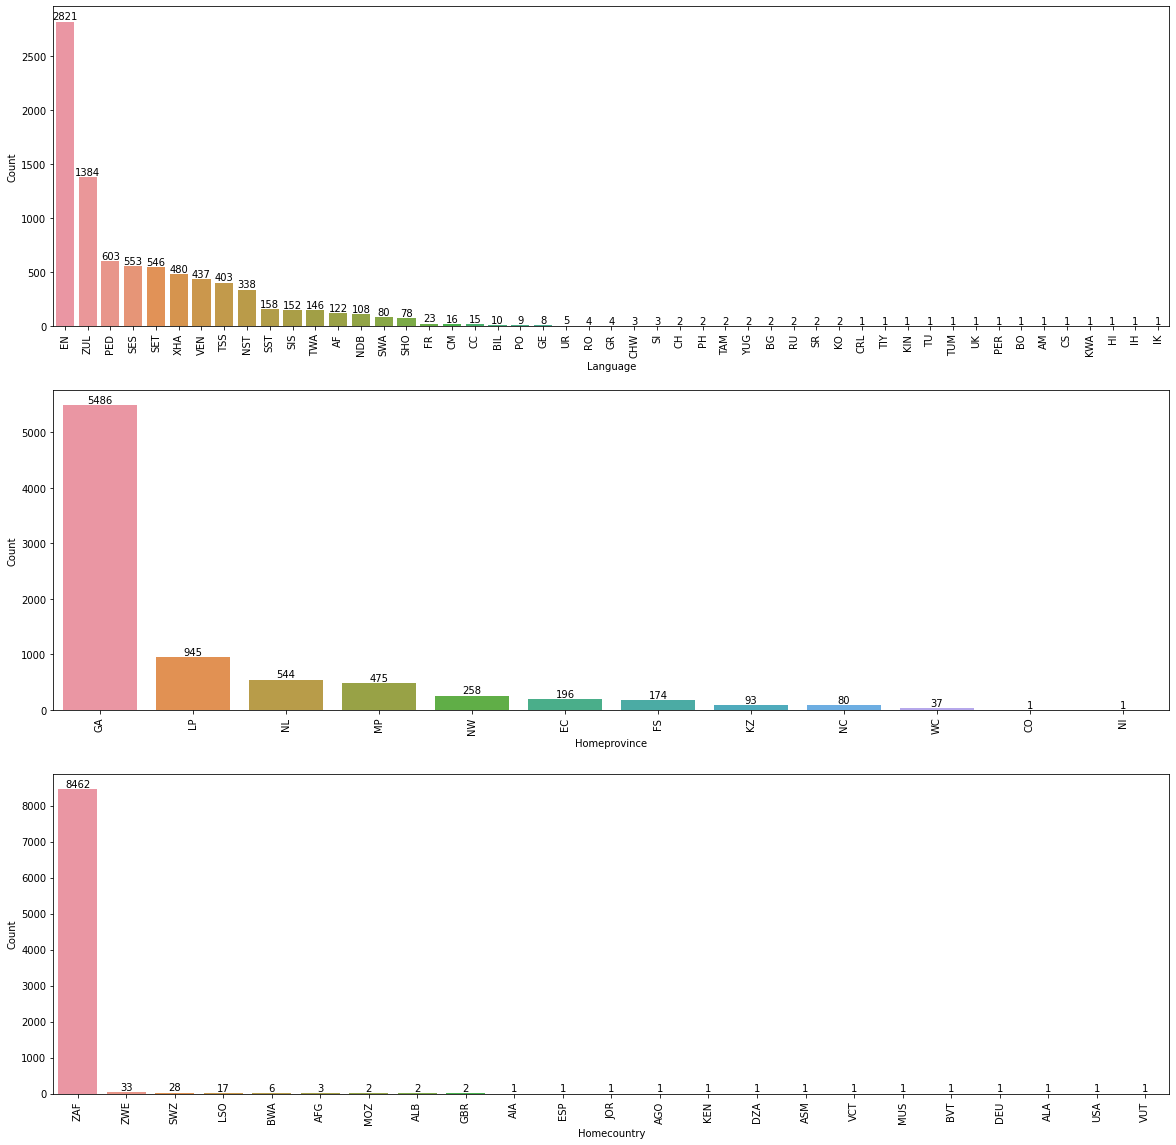

In [25]:
# 3. display the distributions of the columns
regional_columns = ['Language', 'Homeprovince', 'Homecountry']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
ax = axes.ravel()
for i in range(len(regional_columns)):
  df1 = df[regional_columns[i]].value_counts()
  sns.barplot(x=df1.index, y=df1.values, ax=ax[i])
  ax[i].set_xlabel(regional_columns[i])
  ax[i].set_ylabel('Count')
  ax[i].bar_label(ax[i].containers[0])
  ax[i].tick_params(axis='x', rotation=90)
plt.show()

In [26]:
# percentage of nulls in the discrete columns
columns = discrete_columns + regional_columns
df1 = df.isna().sum()/len(df)
df_nulls = pd.DataFrame({'Column': df1.index, '% of nulls': df1.values})
df_nulls = df_nulls[(df_nulls['% of nulls'] != 0) & (df_nulls['Column'].isin(columns))]
df_nulls

,Column,% of nulls
13,ProgressoutcomeYOS2,0.416035
22,Language,0.003501
24,Homeprovince,0.032559
30,isRuralorUrban,0.025090


From the above `DataFrame` we can see that the columns for `Language`, `Homeprovince`, `isRuralorUrban` they have fewer nulls, which we can just remove. But for the `ProgressoutcomeYOS2` we just can't remove them because they constitute more information and they are the main class labels for this thesis or research.

In [27]:
# 4. let's remove the rows which are nulls for the regional_columns
df = df[(df['Language'].notnull()) & (df['Homeprovince'].notnull()) & (df['isRuralorUrban'].notnull())].copy()
print('No. of rows:', len(df))

No. of rows: 8057


#### **3. SPLIT THE DATASET INTO FIRST YEAR AND SECOND YEAR**

###### **3.1 Split the dataset into `first year` and `second year` student datasets.**

In [28]:
# split the dataset into first and second for preprocessing
# 1. first year we only use the secondary school data and the first year data.
# 2. second year we only use the secondary school data, first and second year data.
first_year_columns = ['YearStarted', 'PlanCode', 'PlanDescription', 'ProbOfMatheStreamline', 
                      'ProbOfPhysicsStreamline', 'ProbofEarthStreamline', 'ProbofBioStreamline',
                      'AggregateYOS1', 'ProgressoutcomeYOS1', 'RaceDescription', 'Language', 
                      'Gender', 'Homeprovince', 'Homecountry', 'AgeatFirstYear',
                      'isRuralorUrban', 'LifeOrientation', 'MathematicsMatricLit', 
                      'MathematicsMatricMajor', 'EnglishFirstLang', 'EnglishFirstAdditional', 'Computers', 
                      'AdditionalMathematics', 'NBTAL', 'NBTMA', 'NBTQL']
second_year_columns = ['YearStarted', 'PlanCode', 'PlanDescription', 'ProbOfMatheStreamline', 
                       'ProbOfPhysicsStreamline', 'ProbofEarthStreamline', 'ProbofBioStreamline', 
                       'AggregateYOS1', 'ProgressoutcomeYOS1', 'Firstyearoutcome', 
                       'AggregateYOS2', 'ProgressoutcomeYOS2', 'RaceDescription', 
                       'Language', 'Gender', 'Homeprovince', 'Homecountry', 'AgeatFirstYear', 
                       'AgeatSecondYear', 'isRuralorUrban', 'LifeOrientation', 'MathematicsMatricLit', 
                       'MathematicsMatricMajor', 'EnglishFirstLang', 'EnglishFirstAdditional', 'Computers', 
                       'AdditionalMathematics', 'NBTAL', 'NBTMA', 'NBTQL']

In [29]:
# 2. create the dataframes.
df_first_year = df[first_year_columns].copy()
df_second_year = df[second_year_columns].copy()

###### **3.2 Display the NULLS for `first year` student dataset.**

In [30]:
# 1. dislay the nulls for df_first_year
df1 = df_first_year.isna().sum() / len(df_first_year)
df1 = pd.DataFrame({'Column': df1.index, '% of Nulls': df1.values})
df_first_year_nulls = df1[df1['% of Nulls'] != 0]
df_first_year_nulls

,Column,% of Nulls
7,AggregateYOS1,0.001117
16,LifeOrientation,0.110091
17,MathematicsMatricLit,0.991560
18,MathematicsMatricMajor,0.020231
19,EnglishFirstLang,0.482810
20,EnglishFirstAdditional,0.541144
21,Computers,0.860990
22,AdditionalMathematics,0.800918
23,NBTAL,0.349634
24,NBTMA,0.358570


From the DataFrame above, we can see that the % of nulls in `AggregateYOS1` and `MathematicsMatricMajor` is way too low, so we are just going to remove the them. 

In [31]:
# 2. drop rows for AggregateYOS1 and MathematicsMatricMajor which are null
df_first_year = df_first_year[(df_first_year['AggregateYOS1'].notnull()) & 
                              (df_first_year['MathematicsMatricMajor'].notnull()) & 
                              (df_first_year['LifeOrientation'].notnull())]
print('No. of rows:', len(df_first_year))

No. of rows: 7153


###### **3.3 Display the NULLS for `second year` student dataset.**

In [32]:
# 1. dislay the nulls for df_second_year
df1 = df_second_year.isna().sum() / len(df_second_year)
df1 = pd.DataFrame({'Column': df1.index, '% of Nulls': df1.values})
df_second_year_nulls = df1[df1['% of Nulls'] != 0]
df_second_year_nulls

,Column,% of Nulls
7,AggregateYOS1,0.001117
10,AggregateYOS2,0.416408
11,ProgressoutcomeYOS2,0.415912
18,AgeatSecondYear,0.415912
20,LifeOrientation,0.110091
21,MathematicsMatricLit,0.991560
22,MathematicsMatricMajor,0.020231
23,EnglishFirstLang,0.482810
24,EnglishFirstAdditional,0.541144
25,Computers,0.860990


In [33]:
# 2. drop the corresponding rows just like in first year dataframe since 
# all the columns in df_first_year are in df_second_year
df_second_year = df_second_year[(df_second_year['AggregateYOS1'].notnull()) & 
                              (df_second_year['MathematicsMatricMajor'].notnull()) & 
                              (df_second_year['LifeOrientation'].notnull())]
print('No. of rows:', len(df_second_year))

No. of rows: 7153


In [34]:
# 3. drop the nulls for ProgressoutcomeYOS2
df_second_year = df_second_year[df_second_year['ProgressoutcomeYOS2'].notnull()]

In [35]:
# 1. dislay the number of rows for df_second_year
print('No. of rows:', len(df_second_year))

No. of rows: 4083


#### **4. REPLACE THE CATEGORIAL COLUMNS WITH VALUES AND SPLIT THE DATASET INTO TRAIN, TEST.**



##### **4.1. FIRST YEAR DATASET**

###### **4.1.1. Select the class labels.**

In [36]:
# 1.print the discrete columns
discrete_columns = list(df_first_year.select_dtypes(exclude=['number']).columns) + ['YearStarted']
print(np.array(discrete_columns))

['PlanCode' 'PlanDescription' 'ProgressoutcomeYOS1' 'RaceDescription'
 'Language' 'Gender' 'Homeprovince' 'Homecountry' 'isRuralorUrban'
 'YearStarted']


In [37]:
# 2. choose the outcome codes to use for predicting student performance
outcome_codes = ['PCD', 'MRNM', 'MBR', 'RET', 'MFC', 'MBZ']
df_first_year = df_first_year[df_first_year['ProgressoutcomeYOS1'].isin(outcome_codes)]

In [38]:
# print the unique provinces and countries
print('Home Province:', np.unique(df_first_year['Homeprovince']))
print('Home Country:', np.unique(df_first_year['Homecountry']))

Home Province: ['CO' 'EC' 'FS' 'GA' 'KZ' 'LP' 'MP' 'NC' 'NL' 'NW' 'WC']
Home Country: ['USA' 'ZAF']


From above, we can see that we have `NL` and `KZ` in the `Homeprovince` column which represent the same province `Kwa-Zulu Natal` according to [here](https://en.wikipedia.org/wiki/Provinces_of_South_Africa).

In [39]:
# replace NL with KZ
df_first_year['Homeprovince'][df_first_year['Homeprovince'] == 'NL'] = 'KZ'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


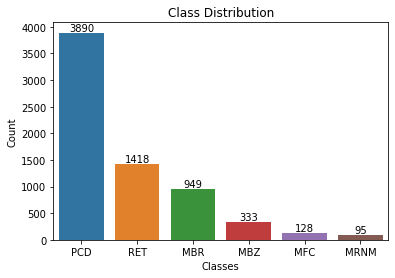

In [40]:
# plot the class distribution
df1 = df_first_year['ProgressoutcomeYOS1'].value_counts()
ax = sns.barplot(x=df1.index, y=df1.values)
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Class Distribution')
ax.bar_label(ax.containers[0])
plt.show()

###### **4.1.2. Split the dataset into train, test.**

In [41]:
# 1. split the first_year dataset into train and test
np.random.seed(SEED)
random.seed(SEED)
X = df_first_year.drop(columns=['ProgressoutcomeYOS1'])
y = df_first_year['ProgressoutcomeYOS1']
f_x_train, f_x_test, f_y_train, f_y_test = train_test_split(X, y, test_size=0.2, 
                                                            random_state=SEED, stratify=y)

In [42]:
# 2. merge the X and y
df_first_year_train = pd.merge(f_x_train, f_y_train, left_index=True, right_index=True)
df_first_year_test = pd.merge(f_x_test, f_y_test, left_index=True, right_index=True)

###### **4.1.3. Replace the categorial columns with value.**

In [43]:
# 1. replace the categorial columns with categorial values in training data
df1 = df_first_year_train.copy()
for i in range(len(discrete_columns)):
  df_first_year_train[discrete_columns[i]] = df_first_year_train[discrete_columns[i]].astype('category').cat.codes

In [44]:
# 2. generate the map for the categorial values
PLAN_CODES = dict(zip(df1[discrete_columns[0]], df_first_year_train[discrete_columns[0]]))
PLAN_DESCRIPTION = dict(zip(df1[discrete_columns[1]], df_first_year_train[discrete_columns[1]]))
PROGRESS_OUTCOME_YOS1 = dict(zip(df1[discrete_columns[2]], df_first_year_train[discrete_columns[2]]))
RACE_DESCRIPTION = dict(zip(df1[discrete_columns[3]], df_first_year_train[discrete_columns[3]]))
LANGUAGE = dict(zip(df1[discrete_columns[4]], df_first_year_train[discrete_columns[4]]))
GENDER = dict(zip(df1[discrete_columns[5]], df_first_year_train[discrete_columns[5]]))
HOME_PROVINCE = dict(zip(df1[discrete_columns[6]], df_first_year_train[discrete_columns[6]]))
HOME_COUNTRY = dict(zip(df1[discrete_columns[7]], df_first_year_train[discrete_columns[7]]))
RURAL_OR_URBAN = dict(zip(df1[discrete_columns[8]], df_first_year_train[discrete_columns[8]]))
YEAR_STARTED = dict(zip(df1[discrete_columns[9]], df_first_year_train[discrete_columns[9]]))

In [45]:
def add_category(map, column):
  for key in column:
    if key not in map.keys():
      map[key] = len(map)
  return map

In [46]:
# 3. update the map using the test dataset
PLAN_CODES = add_category(PLAN_CODES, df_first_year_test['PlanCode'])
PLAN_DESCRIPTION = add_category(PLAN_DESCRIPTION, df_first_year_test['PlanDescription'])
PROGRESS_OUTCOME_YOS1 = add_category(PROGRESS_OUTCOME_YOS1, df_first_year_test['ProgressoutcomeYOS1'])
RACE_DESCRIPTION = add_category(RACE_DESCRIPTION, df_first_year_test['RaceDescription'])
LANGUAGE = add_category(LANGUAGE, df_first_year_test['Language'])
GENDER = add_category(GENDER, df_first_year_test['Gender'])
HOME_PROVINCE = add_category(HOME_PROVINCE, df_first_year_test['Homeprovince'])
HOME_COUNTRY = add_category(HOME_COUNTRY, df_first_year_test['Homecountry'])
RURAL_OR_URBAN = add_category(RURAL_OR_URBAN, df_first_year_test['isRuralorUrban'])
YEAR_STARTED = add_category(YEAR_STARTED, df_first_year_test['YearStarted'])

In [47]:
# 4. save the map
FIRST_YEAR_MAP = {
    'PlanCode': PLAN_CODES,
    'PlanDescription': PLAN_DESCRIPTION,
    'RaceDescription': RACE_DESCRIPTION,
    'Language': LANGUAGE,
    'Gender': GENDER,
    'Homeprovince': HOME_PROVINCE,
    'Homecountry': HOME_COUNTRY,
    'isRuralorUrban': RURAL_OR_URBAN,
    'YearStarted': YEAR_STARTED,
    'ProgressoutcomeYOS1': PROGRESS_OUTCOME_YOS1
}

In [48]:
# 5. replace the categorial columns with categorial values in test data
for i in range(len(discrete_columns)):
  df_first_year_test[discrete_columns[i]] = df_first_year_test[discrete_columns[i]].apply(
                                                            lambda x: FIRST_YEAR_MAP[discrete_columns[i]][x])

In [49]:
# 6. save the test data into a csv file.
df_first_year_test.to_csv('/content/gdrive/MyDrive/COMS HONS RESEARCH PROJECT/first_year_test.csv')

##### **4.2. SECOND YEAR DATASET.**

###### **4.2.1. Select the class labels.**

In [50]:
# 1.print the discrete columns
discrete_columns = list(df_second_year.select_dtypes(exclude=['number']).columns) + ['YearStarted']
print(np.array(discrete_columns))

['PlanCode' 'PlanDescription' 'ProgressoutcomeYOS1' 'Firstyearoutcome'
 'ProgressoutcomeYOS2' 'RaceDescription' 'Language' 'Gender'
 'Homeprovince' 'Homecountry' 'isRuralorUrban' 'YearStarted']


In [51]:
# 2. choose the outcome codes to use for predicting student performance
df_second_year = df_second_year[df_second_year['ProgressoutcomeYOS1'].isin(outcome_codes)]
df_second_year = df_second_year[df_second_year['ProgressoutcomeYOS2'].isin(outcome_codes)]

In [52]:
# print the unique provinces and countries
print('Home Province:', np.unique(df_second_year['Homeprovince']))
print('Home Country:', np.unique(df_second_year['Homecountry']))

Home Province: ['EC' 'FS' 'GA' 'KZ' 'LP' 'MP' 'NC' 'NL' 'NW' 'WC']
Home Country: ['ZAF']


From above, we can see that we have `NL` and `KZ` in the `Homeprovince` column which represent the same province `Kwa-Zulu Natal` according to [here](https://en.wikipedia.org/wiki/Provinces_of_South_Africa).

In [53]:
# 3. replace NL with KZ
df_second_year['Homeprovince'][df_second_year['Homeprovince'] == 'NL'] = 'KZ'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


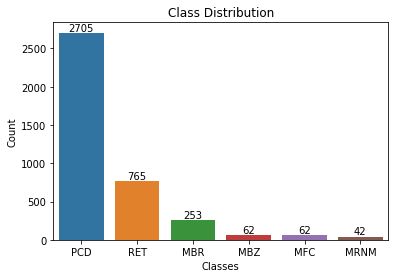

In [54]:
# plot the class distribution
df1 = df_second_year['ProgressoutcomeYOS2'].value_counts()
ax = sns.barplot(x=df1.index, y=df1.values)
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Class Distribution')
ax.bar_label(ax.containers[0])
plt.show()

###### **4.2.2. Split the dataset into train, test.**

In [55]:
# 1. split the second_year dataset into train and test
np.random.seed(SEED)
random.seed(SEED)
X = df_second_year.drop(columns=['ProgressoutcomeYOS2'])
y = df_second_year['ProgressoutcomeYOS2']
s_x_train, s_x_test, s_y_train, s_y_test = train_test_split(X, y, test_size=0.2, 
                                                            random_state=SEED, stratify=y)

In [56]:
# 2. merge X and y.
df_second_year_train = pd.merge(s_x_train, s_y_train, left_index=True, right_index=True)
df_second_year_test = pd.merge(s_x_test, s_y_test, left_index=True, right_index=True)

###### **4.2.3. Replace the categorial columns with value.**

In [57]:
# 1. replace the categorial columns with categorial values in training data
df1 = df_second_year_train.copy()
for i in range(len(discrete_columns)):
  df_second_year_train[discrete_columns[i]] = df_second_year_train[discrete_columns[i]].astype('category').cat.codes

In [58]:
# 2. generate the map for the categorial values
PLAN_CODES = dict(zip(df1[discrete_columns[0]], df_second_year_train[discrete_columns[0]]))
PLAN_DESCRIPTION = dict(zip(df1[discrete_columns[1]], df_second_year_train[discrete_columns[1]]))
PROGRESS_OUTCOME_YOS1 = dict(zip(df1[discrete_columns[2]], df_second_year_train[discrete_columns[2]]))
FIRST_YEAR_OUTCOME = dict(zip(df1[discrete_columns[3]], df_second_year_train[discrete_columns[3]]))
PROGRESS_OUTCOME_YOS2 = dict(zip(df1[discrete_columns[4]], df_second_year_train[discrete_columns[4]]))
RACE_DESCRIPTION = dict(zip(df1[discrete_columns[5]], df_second_year_train[discrete_columns[5]]))
LANGUAGE = dict(zip(df1[discrete_columns[6]], df_second_year_train[discrete_columns[6]]))
GENDER = dict(zip(df1[discrete_columns[7]], df_second_year_train[discrete_columns[7]]))
HOME_PROVINCE = dict(zip(df1[discrete_columns[8]], df_second_year_train[discrete_columns[8]]))
HOME_COUNTRY = dict(zip(df1[discrete_columns[9]], df_second_year_train[discrete_columns[9]]))
RURAL_OR_URBAN = dict(zip(df1[discrete_columns[10]], df_second_year_train[discrete_columns[10]]))
YEAR_STARTED = dict(zip(df1[discrete_columns[11]], df_second_year_train[discrete_columns[11]]))

In [59]:
# 3. update the map using the test dataset
PLAN_CODES = add_category(PLAN_CODES, df_second_year_test['PlanCode'])
PLAN_DESCRIPTION = add_category(PLAN_DESCRIPTION, df_second_year_test['PlanDescription'])
PROGRESS_OUTCOME_YOS1 = add_category(PROGRESS_OUTCOME_YOS1, df_second_year_test['ProgressoutcomeYOS1'])
FIRST_YEAR_OUTCOME = add_category(FIRST_YEAR_OUTCOME, df_second_year_test['Firstyearoutcome'])
PROGRESS_OUTCOME_YOS2 = add_category(PROGRESS_OUTCOME_YOS2, df_second_year_test['ProgressoutcomeYOS2'])
RACE_DESCRIPTION = add_category(RACE_DESCRIPTION, df_second_year_test['RaceDescription'])
LANGUAGE = add_category(LANGUAGE, df_second_year_test['Language'])
GENDER = add_category(GENDER, df_second_year_test['Gender'])
HOME_PROVINCE = add_category(HOME_PROVINCE, df_second_year_test['Homeprovince'])
HOME_COUNTRY = add_category(HOME_COUNTRY, df_second_year_test['Homecountry'])
RURAL_OR_URBAN = add_category(RURAL_OR_URBAN, df_second_year_test['isRuralorUrban'])
YEAR_STARTED = add_category(YEAR_STARTED, df_second_year_test['YearStarted'])

In [60]:
# 4. save the maps into a map
SECOND_YEAR_MAP = {
    'PlanCode': PLAN_CODES,
    'PlanDescription': PLAN_DESCRIPTION,
    'RaceDescription': RACE_DESCRIPTION,
    'Language': LANGUAGE,
    'Gender': GENDER,
    'Homeprovince': HOME_PROVINCE,
    'Homecountry': HOME_COUNTRY,
    'isRuralorUrban': RURAL_OR_URBAN,
    'YearStarted': YEAR_STARTED,
    'Firstyearoutcome': FIRST_YEAR_OUTCOME,
    'ProgressoutcomeYOS1': PROGRESS_OUTCOME_YOS1,
    'ProgressoutcomeYOS2': PROGRESS_OUTCOME_YOS2
}

In [61]:
# 5. replace the categorial columns with categorial values in test data
for i in range(len(discrete_columns)):
  df_second_year_test[discrete_columns[i]] = df_second_year_test[discrete_columns[i]].apply(
                                                            lambda x: SECOND_YEAR_MAP[discrete_columns[i]][x])

In [62]:
# 6. save the test data into a csv file.
df_second_year_test.to_csv('/content/gdrive/MyDrive/COMS HONS RESEARCH PROJECT/second_year_test.csv')

#### **5. PREPROCESS THE FIRST YEAR TRAIN DATA.**

###### **5.1 Display the data.**

In [63]:
# 1. describe the dataset.
first_year_x_train = df_first_year_train.drop(columns=['ProgressoutcomeYOS1']).copy()
first_year_y_train = df_first_year_train['ProgressoutcomeYOS1'].copy()
first_year_x_train.head()

,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofEarthStreamline,ProbofBioStreamline,AggregateYOS1,RaceDescription,Language,...,LifeOrientation,MathematicsMatricLit,MathematicsMatricMajor,EnglishFirstLang,EnglishFirstAdditional,Computers,AdditionalMathematics,NBTAL,NBTMA,NBTQL
3121,7,30,19,0.869565,0.000000,0.0,0.000000,62.428571,0,40,...,86.0,NaN,71.0,74.0,NaN,NaN,NaN,57.0,71.0,47.0
3185,2,19,9,0.032258,0.032258,0.0,0.903226,62.727273,4,11,...,87.0,NaN,48.0,81.0,NaN,NaN,NaN,64.0,48.0,60.0
1704,9,8,19,0.800000,0.000000,0.0,0.000000,40.200000,0,40,...,65.0,NaN,91.0,NaN,71.0,NaN,NaN,47.0,91.0,36.0
9542,4,20,10,0.285714,0.285714,0.0,0.000000,40.166667,0,23,...,81.0,NaN,50.0,NaN,66.0,NaN,45.0,65.0,50.0,41.0
284,9,8,19,0.250000,0.500000,0.0,0.250000,57.750000,0,40,...,88.0,NaN,61.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN


###### **5.2. Perform Imputation for null values.**

In [64]:
# 1. display the null columns.
df1 = first_year_x_train.isna().sum() / len(first_year_x_train)
df1 = pd.DataFrame({'Columns': df1.index, '% of Null': df1.values})
df1 = df1[df1['% of Null'] != 0]
df1

,Columns,% of Null
16,MathematicsMatricLit,0.999633
18,EnglishFirstLang,0.477798
19,EnglishFirstAdditional,0.521284
20,Computers,0.855963
21,AdditionalMathematics,0.785872
22,NBTAL,0.290275
23,NBTMA,0.297982
24,NBTQL,0.293578


Since all the columns which contain nulls are continuous, we just going to replace them with the mean of that respective column.

In [65]:
# 2. Impute the nulls with the mean and save the means used for the null columns.
FIRST_YEAR_IMPUTATION = first_year_x_train.mean()
FIRST_YEAR_MAP['FIRST_YEAR_IMPUTATION'] = FIRST_YEAR_IMPUTATION
first_year_x_train = first_year_x_train.fillna(first_year_x_train.mean())

###### **5.3. Feature Selection.**

In the related work of the research, the authors have used `Pearson's correlation` method and `entropy-based` technique. We are going to use `entropy-based` method as our methods for selecting best features.

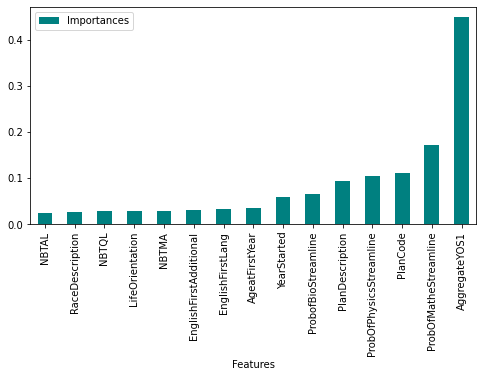

In [66]:
# 1. Use Entropy-Based Technique/ Mutual Information Gain
# 1.1. configure to select k features
first_year_fs = SelectKBest(score_func=mutual_info_classif, k=15)
first_year_fs.fit(first_year_x_train, first_year_y_train)

# 1.2. save the feature selector to the MAP.
FIRST_YEAR_MAP['first_year_feature_selector'] = first_year_fs

final_df = pd.DataFrame({"Features": first_year_x_train.columns, 
                         "Importances": first_year_fs.scores_, 
                         "Included": first_year_fs.get_support()})
final_df.set_index('Importances')

# 1.2. sort in ascending order to better visualization.
final_df = final_df[final_df.Included == True].sort_values('Importances')

# 1.3. plot the feature importances in bars.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
final_df.plot.bar(color='teal', x='Features', ax=ax)
plt.show()

In [67]:
# 2. Transform the X_train
feature_names = first_year_fs.get_feature_names_out()
first_year_x_train = first_year_fs.transform(first_year_x_train)
first_year_x_train = pd.DataFrame(first_year_x_train)
first_year_x_train.columns = feature_names
first_year_x_train.head()

,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofBioStreamline,AggregateYOS1,RaceDescription,AgeatFirstYear,LifeOrientation,EnglishFirstLang,EnglishFirstAdditional,NBTAL,NBTMA,NBTQL
0,7.0,30.0,19.0,0.869565,0.000000,0.000000,62.428571,0.0,22.0,86.0,74.00000,73.191261,57.000000,71.000000,47.000000
1,2.0,19.0,9.0,0.032258,0.032258,0.903226,62.727273,4.0,26.0,87.0,81.00000,73.191261,64.000000,48.000000,60.000000
2,9.0,8.0,19.0,0.800000,0.000000,0.000000,40.200000,0.0,19.0,65.0,74.02565,71.000000,47.000000,91.000000,36.000000
3,4.0,20.0,10.0,0.285714,0.285714,0.000000,40.166667,0.0,24.0,81.0,74.02565,66.000000,65.000000,50.000000,41.000000
4,9.0,8.0,19.0,0.250000,0.500000,0.250000,57.750000,0.0,19.0,88.0,73.00000,73.191261,60.389349,51.540512,55.152468


In [68]:
# 3. save the Unstandardized dataset to csv file.
first_year_y_train.index = np.arange(len(first_year_y_train))
pd.merge(first_year_x_train, 
         first_year_y_train, 
         left_index=True, 
         right_index=True).to_csv('/content/gdrive/MyDrive/COMS HONS RESEARCH PROJECT/unstandardized_first_year_train.csv')

###### **5.4. Standardize the Data.**

In [69]:
# 1. Standardize the data and save the scaler.
first_year_scaler = StandardScaler()
first_year_scaler.fit(first_year_x_train)
FIRST_YEAR_MAP['first_year_scaler'] = first_year_scaler
first_year_x_train = first_year_scaler.transform(first_year_x_train)

In [70]:
# 2. add the column names to the train data after standardization
first_year_x_train = pd.DataFrame(first_year_x_train)
first_year_x_train.columns = feature_names
first_year_x_train.head()

,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofBioStreamline,AggregateYOS1,RaceDescription,AgeatFirstYear,LifeOrientation,EnglishFirstLang,EnglishFirstAdditional,NBTAL,NBTMA,NBTQL
0,0.633229,0.813618,0.291103,1.400196,-0.900613,-0.660940,0.618172,-0.659496,-0.342259,0.543607,-4.611209e-03,0.000000,-0.310131,1.407877e+00,-6.116022e-01
1,-1.065648,-0.130947,-0.635273,-1.162318,-0.739018,2.484212,0.641247,1.802742,0.958744,0.668683,1.253807e+00,0.000000,0.330381,-2.561529e-01,3.636643e-01
2,1.312780,-1.075512,0.291103,1.187297,-0.900613,-0.660940,-1.099003,-0.659496,-1.318012,-2.082976,2.554742e-15,-0.444814,-1.225148,2.854859e+00,-1.436828e+00
3,-0.386097,-0.045078,-0.542636,-0.386634,0.530659,-0.660940,-1.101578,-0.659496,0.308242,-0.081769,2.554742e-15,-1.459788,0.421883,-1.114547e-01,-1.061725e+00
4,1.312780,-1.075512,0.291103,-0.495935,1.604113,0.209593,0.256748,-0.659496,-1.318012,0.793758,-1.843852e-01,0.000000,0.000000,-5.140714e-16,-5.330527e-16


###### **5.5. Save the Train Data.**

In [71]:
# 1. save the train data to a csv file
first_year_y_train.index = np.arange(len(first_year_y_train))
pd.merge(first_year_x_train, 
         first_year_y_train, 
         left_index=True, 
         right_index=True).to_csv('/content/gdrive/MyDrive/COMS HONS RESEARCH PROJECT/first_year_train.csv')

#### **6. PREPROCESS THE SECOND YEAR TRAIN DATA.**

###### **6.1 Display the data.**

In [72]:
# 1. describe the dataset.
second_year_x_train = df_second_year_train.drop(columns=['ProgressoutcomeYOS2']).copy()
second_year_y_train = df_second_year_train['ProgressoutcomeYOS2'].copy()
second_year_x_train.head()

,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofEarthStreamline,ProbofBioStreamline,AggregateYOS1,ProgressoutcomeYOS1,Firstyearoutcome,...,LifeOrientation,MathematicsMatricLit,MathematicsMatricMajor,EnglishFirstLang,EnglishFirstAdditional,Computers,AdditionalMathematics,NBTAL,NBTMA,NBTQL
9374,8,4,0,0.857143,0.000000,0.000000,0.0,71.428571,3,1,...,91.0,NaN,64.0,91.0,NaN,91.0,NaN,71.0,64.0,86.0
12360,7,4,0,0.888889,0.000000,0.000000,0.0,85.142857,3,1,...,88.0,NaN,99.0,90.0,NaN,NaN,89.0,NaN,NaN,NaN
8916,5,15,14,0.764706,0.000000,0.000000,0.0,68.666667,3,1,...,90.0,NaN,47.0,80.0,NaN,76.0,NaN,68.0,47.0,53.0
241,0,0,41,0.041667,0.638889,0.000000,0.0,56.875000,3,1,...,96.0,NaN,83.0,84.0,NaN,NaN,98.0,76.0,83.0,92.0
1104,7,24,22,0.521739,0.304348,0.173913,0.0,51.250000,4,0,...,68.0,NaN,82.0,NaN,78.0,NaN,NaN,NaN,NaN,NaN


###### **6.2. Perform Imputation for null values.**

In [73]:
df1 = second_year_x_train.isna().sum() / len(second_year_x_train)
df1 = pd.DataFrame({'Columns': df1.index, '% of Null': df1.values})
df1 = df1[df1['% of Null'] != 0]
df1

,Columns,% of Null
10,AggregateYOS2,0.000964
20,MathematicsMatricLit,0.999357
22,EnglishFirstLang,0.412408
23,EnglishFirstAdditional,0.586950
24,Computers,0.846673
25,AdditionalMathematics,0.730955
26,NBTAL,0.310511
27,NBTMA,0.317904
28,NBTQL,0.313083


Since all the columns which contain nulls are continuous, we just going to replace them with the mean of that respective column.

In [74]:
# 2. Impute the nulls with the mean and save the means used for the null columns.
SECOND_YEAR_IMPUTATION = second_year_x_train.mean()
SECOND_YEAR_MAP['SECOND_YEAR_IMPUTATION'] = SECOND_YEAR_IMPUTATION
second_year_x_train = second_year_x_train.fillna(second_year_x_train.mean())

###### **6.3. Feature Selection.**

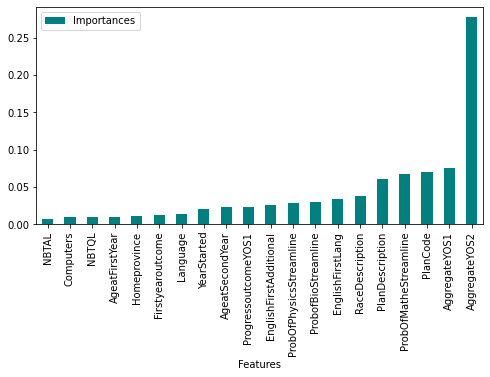

In [75]:
# 1. Use Entropy-Based Technique/ Mutual Information Gain
# 1.1. configure to select k features
second_year_fs = SelectKBest(score_func=mutual_info_classif, k=20)
second_year_fs.fit(second_year_x_train, second_year_y_train)

# 1.2. save the feature selector to the MAP.
SECOND_YEAR_MAP['second_year_feature_selector'] = second_year_fs

final_df = pd.DataFrame({"Features": second_year_x_train.columns, 
                         "Importances": second_year_fs.scores_, 
                         "Included": second_year_fs.get_support()})
final_df.set_index('Importances')

# 1.2. sort in ascending order to better visualization.
final_df = final_df[final_df.Included == True].sort_values('Importances')

# 1.3. plot the feature importances in bars.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
final_df.plot.bar(color='teal', x='Features', ax=ax)
plt.show()

In [76]:
# 2. Transform the X_train
feature_names = second_year_fs.get_feature_names_out()
second_year_x_train = second_year_fs.transform(second_year_x_train)
second_year_x_train = pd.DataFrame(second_year_x_train)
second_year_x_train.columns = feature_names
second_year_x_train.head()

,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofBioStreamline,AggregateYOS1,ProgressoutcomeYOS1,Firstyearoutcome,AggregateYOS2,RaceDescription,Language,Homeprovince,AgeatFirstYear,AgeatSecondYear,EnglishFirstLang,EnglishFirstAdditional,Computers,NBTAL,NBTQL
0,8.0,4.0,0.0,0.857143,0.000000,0.0,71.428571,3.0,1.0,68.714286,3.0,6.0,3.0,20.0,20.0,91.000000,72.957198,91.000000,71.000000,86.000000
1,7.0,4.0,0.0,0.888889,0.000000,0.0,85.142857,3.0,1.0,72.714286,4.0,6.0,2.0,21.0,21.0,90.000000,72.957198,77.696017,62.144056,56.805803
2,5.0,15.0,14.0,0.764706,0.000000,0.0,68.666667,3.0,1.0,60.750000,3.0,6.0,2.0,23.0,23.0,80.000000,72.957198,76.000000,68.000000,53.000000
3,0.0,0.0,41.0,0.041667,0.638889,0.0,56.875000,3.0,1.0,78.777778,4.0,6.0,2.0,28.0,28.0,84.000000,72.957198,77.696017,76.000000,92.000000
4,7.0,24.0,22.0,0.521739,0.304348,0.0,51.250000,4.0,0.0,46.125000,0.0,33.0,3.0,21.0,21.0,74.666302,78.000000,77.696017,62.144056,56.805803


In [77]:
# 3. save the Unstandardized dataset to csv file.
second_year_y_train.index = np.arange(len(second_year_y_train))
pd.merge(second_year_x_train, 
         second_year_y_train, 
         left_index=True, 
         right_index=True).to_csv('/content/gdrive/MyDrive/COMS HONS RESEARCH PROJECT/unstandardized_second_year_train.csv')

###### **6.4. Standardize the Data.**

In [78]:
# 1. Standardize the data and save the scaler.
second_year_scaler = StandardScaler()
second_year_scaler.fit(second_year_x_train)
SECOND_YEAR_MAP['second_year_scaler'] = second_year_scaler
second_year_x_train = second_year_scaler.transform(second_year_x_train)

In [79]:
# 2. add the column names to the train data after standardization
second_year_x_train = pd.DataFrame(second_year_x_train)
second_year_x_train.columns = feature_names
second_year_x_train.head()

,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofBioStreamline,AggregateYOS1,ProgressoutcomeYOS1,Firstyearoutcome,AggregateYOS2,RaceDescription,Language,Homeprovince,AgeatFirstYear,AgeatSecondYear,EnglishFirstLang,EnglishFirstAdditional,Computers,NBTAL,NBTQL
0,1.412382,-1.193108,-1.428669,1.193993,-0.667475,-0.686405,1.249947,0.005711,0.506922,0.916101,1.041292,-1.005582,0.326652,-1.418129,-1.418129,2.704824e+00,3.106592e-15,2.929565e+00,0.829917,2.167776e+00
1,1.022954,-1.193108,-1.428669,1.276913,-0.667475,-0.686405,2.709529,0.005711,0.506922,1.268135,1.631679,-1.005582,-0.439724,-1.044375,-1.044375,2.539227e+00,3.106592e-15,-3.129260e-15,0.000000,1.055208e-15
2,0.244097,0.106569,0.153156,0.952548,-0.667475,-0.686405,0.956004,0.005711,0.506922,0.215177,1.041292,-1.005582,-0.439724,-0.296865,-0.296865,8.832487e-01,3.106592e-15,-3.734665e-01,0.548778,-2.825948e-01
3,-1.703046,-1.665717,3.203819,-0.936027,2.824622,-0.686405,-0.298957,0.005711,0.506922,1.801773,1.631679,-1.005582,-0.439724,1.571908,1.571908,1.545640e+00,3.106592e-15,-3.129260e-15,1.298482,2.613298e+00
4,1.022954,1.169941,1.057056,0.317920,0.996057,-0.686405,-0.897613,1.274687,-1.972691,-1.071946,-0.729872,1.472077,0.326652,-1.044375,-1.044375,-2.353286e-15,1.102392e+00,-3.129260e-15,0.000000,1.055208e-15


###### **6.5. Save the Train Data.**

In [80]:
# 3. save the train data to a csv file
second_year_y_train.index = np.arange(len(second_year_y_train))
pd.merge(second_year_x_train, 
         second_year_y_train, 
         left_index=True, 
         right_index=True).to_csv('/content/gdrive/MyDrive/COMS HONS RESEARCH PROJECT/second_year_train.csv')

#### **7. SAVE THE MAPS FOR THE DATASET.**

In [81]:
with open('/content/gdrive/MyDrive/COMS HONS RESEARCH PROJECT/first_year_map.pkl', 'wb') as fid:
  pickle.dump(FIRST_YEAR_MAP, fid)

In [82]:
with open('/content/gdrive/MyDrive/COMS HONS RESEARCH PROJECT/second_year_map.pkl', 'wb') as fid:
  pickle.dump(SECOND_YEAR_MAP, fid)